In [2]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

me=0.511
e=0.303
p_=5
Z=57
epsilon=np.sqrt(p_**2+me**2)
h_=np.log((epsilon+p_)/(epsilon-p_))

@jit(nopython=True,cache=True)
def H_cap(epsilon_f,p_f):
    res=np.log((epsilon*epsilon_f+p_*p_f-me**2)/(epsilon*epsilon_f-p_*p_f-me**2))
    return res

@jit(nopython=True,cache=True)
def h_1(epsilon_f,p_f):
    res=np.log((epsilon_f+p_f)/(epsilon_f-p_f))
    return res

@jit(nopython=True,cache=True)
def sigma_omega(omega):
    epsilon_f=epsilon-omega
    p_f=np.sqrt(epsilon_f**2-me**2)
    h_1_=h_1(epsilon_f,p_f)
    res=Z**2*e**6/(8*(2*np.pi)**3*me**2*omega*p_)*p_f*(4/3-epsilon*epsilon_f*(p_**2+p_f**2)/(p_**2*p_f**2)+me**2*(h_*epsilon_f/p_**3+h_1_*epsilon/p_f**3-h_*h_1_/p_/p_f)\
        +H_cap(epsilon_f,p_f)*(8*epsilon*epsilon_f/3/p_/p_f+omega**2/p_**3/p_f**3*(epsilon**2*epsilon_f*2+p_**2*p_f**2+me**2*epsilon*epsilon_f)\
                               +me**2*omega/2/p_/p_f*(h_*(epsilon*epsilon_f+p_**2)/p_**3-h_1_*(epsilon*epsilon_f+p_f**2)/p_f**3)))
    return res

print(sigma_omega(epsilon - me))

329527.6141321476


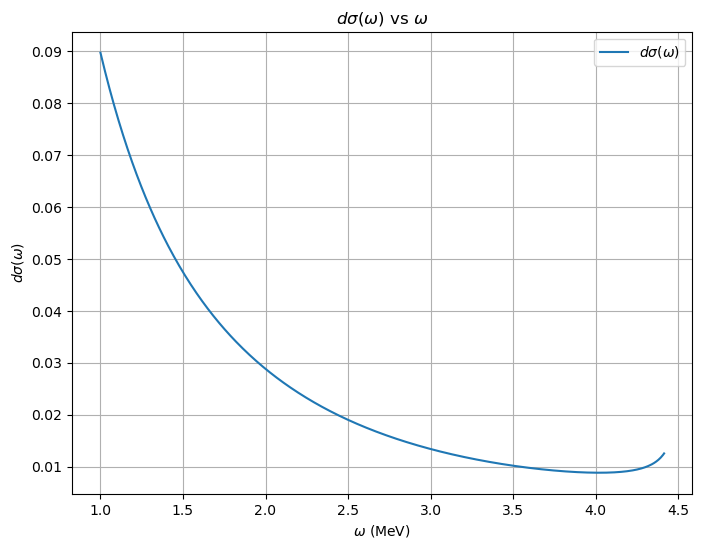

In [4]:
# Define the range of omega
omega_values = np.linspace(1, epsilon - me-0.1, 500)  # Avoid omega = 0 and ensure epsilon_f > me
sigma_values = [sigma_omega(omega) for omega in omega_values]

# Plot the results
fig = plt.figure(figsize=(8, 6))
plt.plot(omega_values, sigma_values, label=r'$d\sigma(\omega)$')
plt.xlabel(r'$\omega$ (MeV)')
plt.ylabel(r'$d\sigma(\omega)$')
plt.title(r'$d\sigma(\omega)$ vs $\omega$')
plt.grid(True)
plt.legend()
plt.show()